In [9]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import insertion_deletion_curves
from experiments.lib.util import get_ds_model, get_mask_range, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [10]:
BATCH_SIZE = 4
DATASET = "MNIST"
MODEL = "CNN"
METHOD = "InputXGradient"
MODE = "insertion"

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=False, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = get_mask_range(DATASET)

# Run Insertion/Deletion Curves

In [11]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4)))
batch = batch.to(device)
labels = labels.to(device)
result, debug_data = insertion_deletion_curves(batch, labels, model, method, mask_range,
                                               mask_value=0., mode=MODE, debug_mode=True)

# Plot results

## Plot the original samples and their attributions

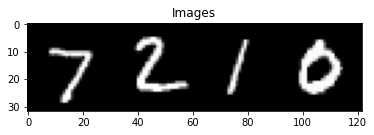

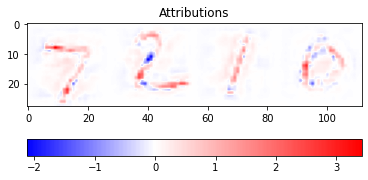

In [12]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 0


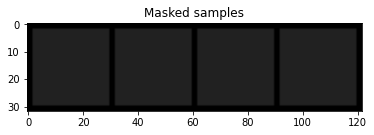

n: 25


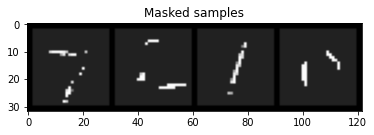

n: 50


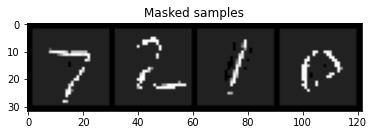

n: 75


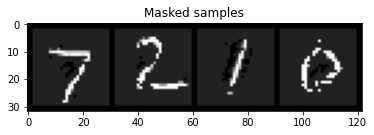

n: 100


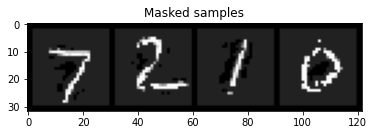

n: 125


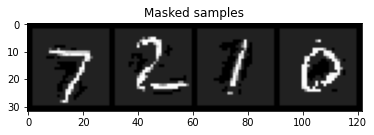

n: 150


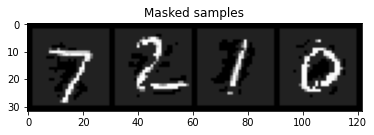

n: 175


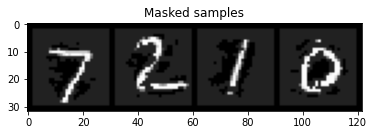

n: 200


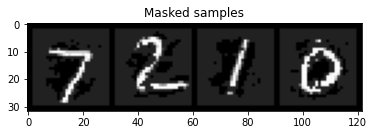

n: 225


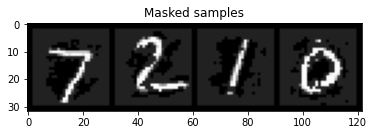

n: 250


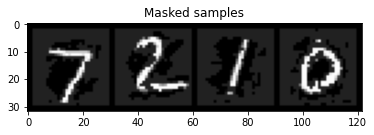

n: 275


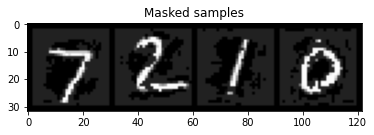

n: 300


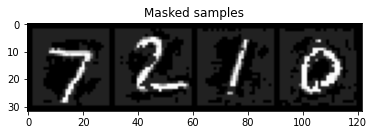

n: 325


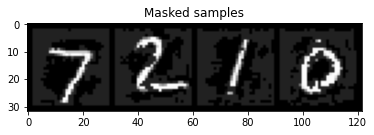

n: 350


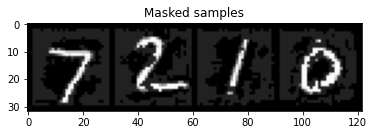

n: 375


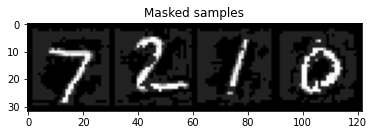

In [13]:
for n_idx, masked_samples in enumerate(debug_data["masked_samples"]):
    print(f"n: {mask_range[n_idx]}")
    imshow(dataset.denormalize(masked_samples), title="Masked samples")